In [1]:
from pycalphad import Database, equilibrium, variables as v

dbf = Database('databases/mc_fe_v2.059.pycalphad.tdb')

/opt/conda/lib/python3.8/site-packages/pycalphad/io/tdb.py:965: UserWarning: The type definition character `%` was defined in the following phases: ['LIQUID', 'FCC_A1', 'BCC_A2', 'H_BCC', 'BCC_DISL', 'HCP_A3', 'ALPHA_MN', 'BETA_MN', 'BETA_RHOMBO_B', 'DIAMOND_A4', 'GRAPHITE', 'BCC_B2', 'CHI_A12', 'CO3MO', 'CO3V', 'COV3', 'CR3MN5', 'G_PHASE', 'LAVES_PHASE', 'MNNI', 'MNNI2', 'MNNI_T3', 'MU_PHASE', 'MU_PHASE_I', 'ETA', 'NITI2', 'PI_PHASE', 'R_PHASE', 'SIGMA', 'FE17Y2', 'NI5Y', 'PDFE_L12', 'PDMN_AF', 'PDMN_P', 'PDMN_B2', 'PD2MN', 'PD3MN', 'PD5MN3', 'PD6FE5MN2', 'CEMENTITE', 'CR2VC2', 'K_CARB', 'KSI_CARBIDE', 'M3C2', 'M6C', 'M7C3', 'M12C', 'M23C6', 'MOC_ETA', 'V3C2', 'WC', 'EPS_CARB', 'ETA_CARB', 'FE24C10', 'KSI_FE5C2', 'ALN', 'ALN_EQU', 'BN_HP4', 'CR3NI2SIN', 'FE4N', 'MN6N4', 'MN6N5', 'MNSIN2', 'SI3N4', 'ZET', 'CRB', 'CR2B', 'CR5B3', 'FEB', 'FENBB', 'FE3NB3B4', 'M2B', 'MNB2', 'MNB4', 'O_MN2B', 'MN3B4', 'MOB', 'MOB2', 'MO2M1B2', 'NBB', 'NB3B2', 'M5B6', 'TIB', 'TIB2', 'TI3B4', 'A_CHALC', 'ANI

In [2]:
phases = list(set(dbf.phases.keys()) - {'GP_MAT'})
# SS316 is actually Fe-17Cr-12Ni-2.5Mo-0.08C-2Mn-0.75Si-0.1N
# We simplified the system here to meet constraints in our workshop deployment
mass_fracs = {v.W('CR'): 17./100, v.W('NI'): 12./100,
              v.W('C'): 0.08/100, v.W('SI'): 0.75/100, v.W('N'): 0.1/100}
conds = v.get_mole_fractions(mass_fracs, 'FE', dbf)
conds[v.T] = (700, 1300, 10)
conds[v.P] = 1e5
conds[v.N] = 1
eq = equilibrium(dbf, ['FE', 'CR', 'NI', 'C', 'SI', 'N', 'VA'], phases, conds, calc_opts={'pdens': 50})

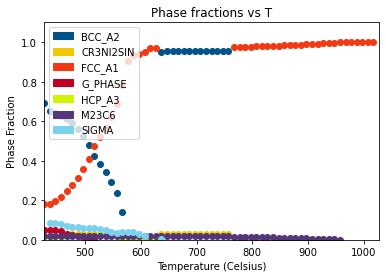

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend
phases = sorted(set(eq.Phase.values.flatten()) - {''})
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((700-273.15, 1300-273.15))

for name in phases:
    phase_indices = np.nonzero(eq.Phase.values == name)
    plt.scatter(np.take(eq['T'].values, phase_indices[2])-273.15, eq.NP.values[phase_indices], color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='upper left')

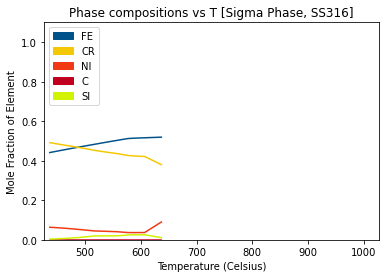

In [4]:
plt.gca().set_title('Phase compositions vs T [Sigma Phase]')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Mole Fraction of Element')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((700-273.15, 1300-273.15))
elements = ['FE', 'CR', 'NI', 'C', 'SI']
phase_handles, phasemap = phase_legend(elements)
for name in ['SIGMA']:
    phase_indices = np.nonzero(eq.Phase.values == name)
    for el in elements:
        plt.plot(np.take(eq['T'].values, phase_indices[2])-273.15, eq.X.sel(component=el).values[phase_indices], color=phasemap[el])
plt.gca().legend(phase_handles, elements, loc='upper left')

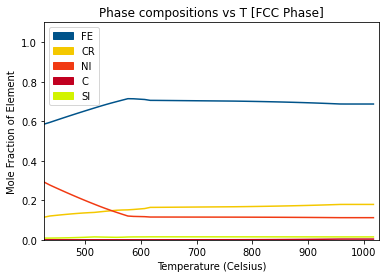

In [6]:
plt.gca().set_title('Phase compositions vs T [FCC Phase]')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Mole Fraction of Element')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((700-273.15, 1300-273.15))
elements = ['FE', 'CR', 'NI', 'C', 'SI']
phase_handles, phasemap = phase_legend(elements)
for name in ['FCC_A1']:
    phase_indices = np.nonzero(eq.Phase.values == name)
    for el in elements:
        plt.plot(np.take(eq['T'].values, phase_indices[2])-273.15, eq.X.sel(component=el).values[phase_indices], color=phasemap[el])
plt.gca().legend(phase_handles, elements, loc='upper left')